### NAME - ABHISHEK NAUTIYAL
### PRN - 240340141001

In [1]:
from time import time
import numpy as np
import pandas as pd
import xgboost

import matplotlib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, roc_auc_score
import matplotlib.pyplot as plt

In [3]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
TEST_SIZE = 0.2

In [5]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [8]:
for col in train_df.columns:
    print(f'Col: {col} | {train_df[col].unique()}')

Col: ID | [     1      3      4 ... 151835 151836 151838]
Col: var3 | [      2     229     178       0       8       3       4      10     110
       7     177       1       6     137      17 -999999      13      14
     148       5      11      15     122      22       9      58     121
      12     127      33     125     209      72      31      51      16
     107     174     141     191     104     129      18      49      73
      94     131     219     187     114      28      89     115      53
     126      47      84     235     161     197      23      30     146
     158     138      26     120      66     216     215      90      20
      21     103     192     142      29     163     223      95      98
      38     156      97     105     150     183     184      52      54
     220      25     225      86     124      27     162      19     195
     218      24      60     108      82      36     102     175     144
     169      64     201      79      91     159     1

In [9]:
class_names = train_df['TARGET'].unique()
class_names

array([0, 1], dtype=int64)

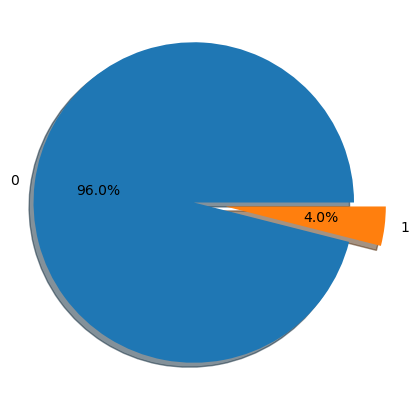

In [12]:
fig, ax = plt.subplots(figsize = (5,5))
explode = (0,0.2)
ax.pie(train_df['TARGET'].value_counts(),explode=explode,
       labels=class_names,
       autopct='%1.1f%%',
       shadow=True,
       startangle=0)
ax.axis('equal')
plt.show()

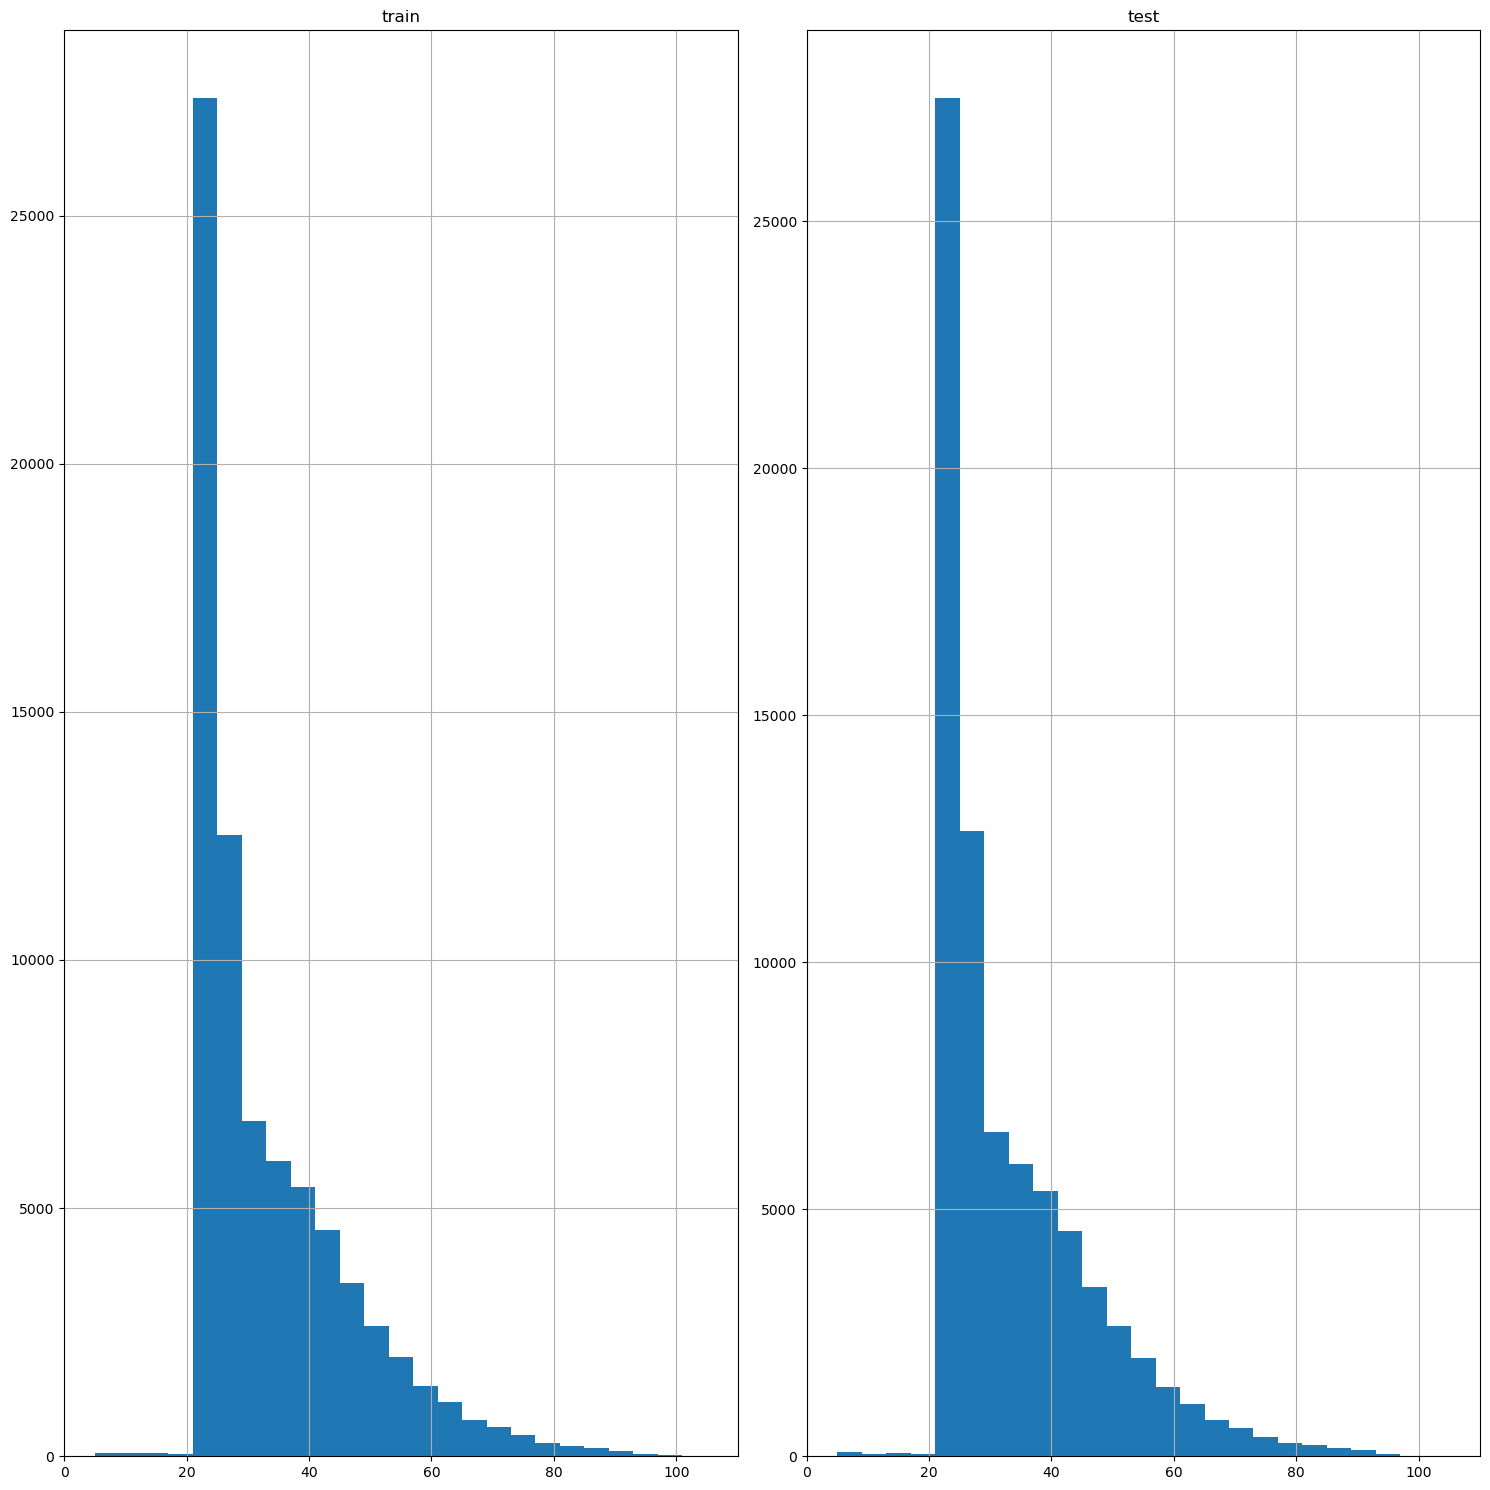

In [16]:
fig, axes = plt.subplots(1,2,figsize=(15,15))
ax=axes[0]
train_df['var15'].hist(bins=25, ax=ax)
ax.set_title('train')
ax = axes[1]
test_df['var15'].hist(bins=25,ax=ax)
ax.set_title('test')
plt.tight_layout()

In [17]:
train_df['n0'] = (train_df==0).sum(axis=1)
test_df['n0'] = (test_df==0).sum(axis=1)
train_df.shape, test_df.shape

((76020, 372), (75818, 371))

In [18]:
drop_cols = []

for cols in train_df.columns:
    if train_df[col].std() == 0:
        drop_cols.append(col)

train_df.drop(drop_cols,axis=1,inplace=True)
train_df.shape

(76020, 372)

In [19]:
test_df.drop(drop_cols,axis=1,inplace=True)
test_df.shape

(75818, 371)

In [ ]:
#Remove duplicate columns
drop_cols = []
cols = train_df.columns

for i in range(len(cols)-1):
    v = train_df[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,train_df[cols[j]].values):
            drop_cols.append(cols[j])


In [20]:
train_df.drop(drop_cols,axis=1,inplace=True)
test_df.drop(drop_cols,axis=1,inplace=True)


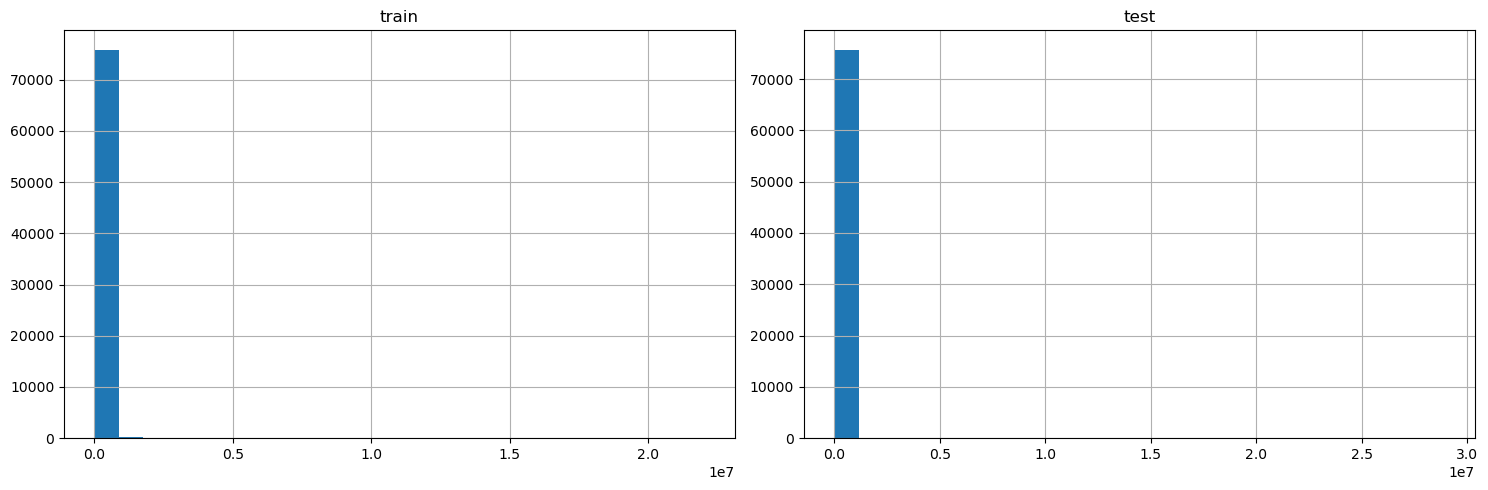

In [23]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
ax = axes[0]
train_df['var38'].hist(bins=25,ax=ax)
ax.set_title('train')
ax = axes[1]
test_df['var38'].hist(bins=25,ax=ax)
ax.set_title('test')
plt.tight_layout()

In [24]:
train_df['var38'] = np.log(train_df['var38'])
test_df['var38'] = np.log(test_df['var38'])

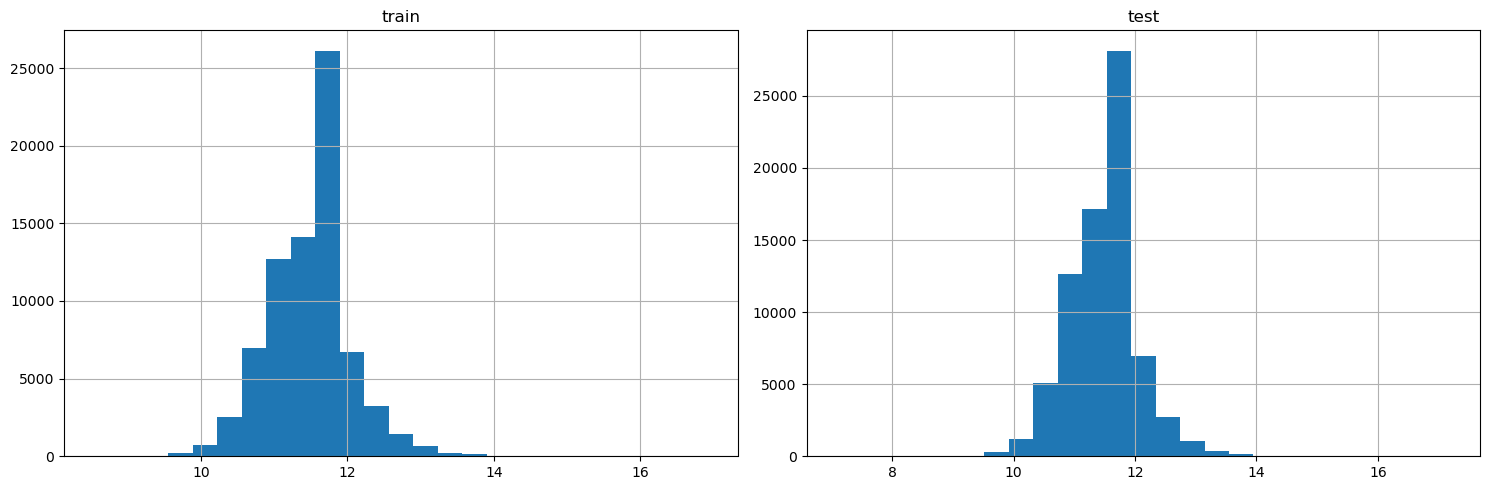

In [25]:
fig, axes = plt.subplots(1,2, figsize = (15,5))
ax = axes[0]
train_df['var38'].hist(bins=25,ax=ax)
ax.set_title('train')
ax = axes[1]
test_df['var38'].hist(bins=25,ax=ax)
ax.set_title('test')
plt.tight_layout()

In [26]:
fea_train_df = train_df.drop('TARGET', axis = 1)
y = train_df['TARGET']

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(fea_train_df, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE)

print(X_train.shape)
print(y_train.shape)

print(X_valid.shape)
print(y_valid.shape)

(60816, 371)
(60816,)
(15204, 371)
(15204,)


In [28]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_valid = sc.transform(X_valid)

X_test = sc.transform(test_df)

In [29]:
y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()

In [30]:
from xgboost.sklearn import XGBClassifier


# set the validation set for xgb training
eval_set = [(X_train,y_train), (X_valid,y_valid)]

# try using... eval_metric: mlogloss, merror, ndcg@n-, logloss, auc
clf = XGBClassifier(eval_metric='logloss', random_state = RANDOM_STATE)

In [32]:
clf.fit(X_train, y_train,
        eval_set=eval_set,
        early_stopping_rounds=100)

c:\Users\user\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.15863	validation_1-logloss:0.16087
[1]	validation_0-logloss:0.13218	validation_1-logloss:0.13524
[2]	validation_0-logloss:0.11387	validation_1-logloss:0.11797
[3]	validation_0-logloss:0.10193	validation_1-logloss:0.10678
[4]	validation_0-logloss:0.09218	validation_1-logloss:0.09762
[5]	validation_0-logloss:0.08587	validation_1-logloss:0.09188
[6]	validation_0-logloss:0.08041	validation_1-logloss:0.08746
[7]	validation_0-logloss:0.07706	validation_1-logloss:0.08464
[8]	validation_0-logloss:0.07363	validation_1-logloss:0.08231
[9]	validation_0-logloss:0.07168	validation_1-logloss:0.08083
[10]	validation_0-logloss:0.06905	validation_1-logloss:0.07852
[11]	validation_0-logloss:0.06699	validation_1-logloss:0.07801
[12]	validation_0-logloss:0.06546	validation_1-logloss:0.07711
[13]	validation_0-logloss:0.06339	validation_1-logloss:0.07556
[14]	validation_0-logloss:0.06262	validation_1-logloss:0.07496
[15]	validation_0-logloss:0.06208	validation_1-logloss:0.07453
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=24, ...)

In [33]:
y_proba = clf.predict_proba(X_valid)
print(roc_auc_score(y_valid,y_proba[:,1]))

0.9533640888405128


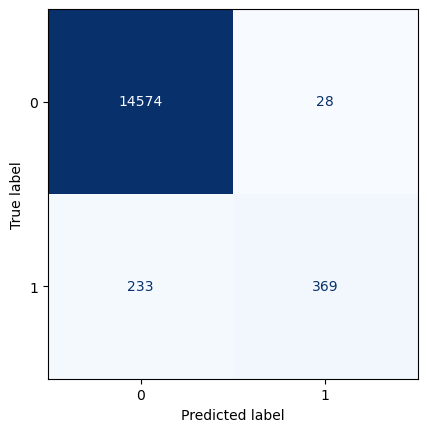

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_valid, clf.predict(X_valid))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.grid(False)